In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
1,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
2,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800
3,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
4,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400
...,...,...,...,...,...,...,...
248,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
249,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
250,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
251,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [ ]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
252,2022-05-23,2202.080078,2230.969971,2183.084961,2228.75,2228.75,781233


In [ ]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
1,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
2,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800
3,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
4,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400
...,...,...,...,...,...,...,...
247,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
248,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
249,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
250,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [ ]:
days = list()
adj_close_prices = list()

In [ ]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
for day in df_days:
   days.append([int(str((day.split('-')[2]).replace('0','')))])
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [ ]:
print(days)

[[24], [25], [26], [27], [28], [1], [2], [3], [4], [7], [8], [9], [1], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [3], [1], [2], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [2], [21], [22], [23], [26], [27], [28], [29], [3], [2], [3], [4], [5], [6], [9], [1], [11], [12], [13], [16], [17], [18], [19], [2], [23], [24], [25], [26], [27], [3], [31], [1], [2], [3], [7], [8], [9], [1], [13], [14], [15], [16], [17], [2], [21], [22], [23], [24], [27], [28], [29], [3], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [2], [21], [22], [25], [26], [27], [28], [29], [1], [2], [3], [4], [5], [8], [9], [1], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [26], [29], [3], [1], [2], [3], [6], [7], [8], [9], [1], [13], [14], [15], [16], [17], [2], [21], [22], [23], [27], [28], [29], [3], [31], [3], [4], [5], [6], [7], [1], [11], [12], [13], [14], [18], [19], [2], [21], [24], [25], [26], [27], [28], [31], [1], [2], [3], [4

In [ ]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

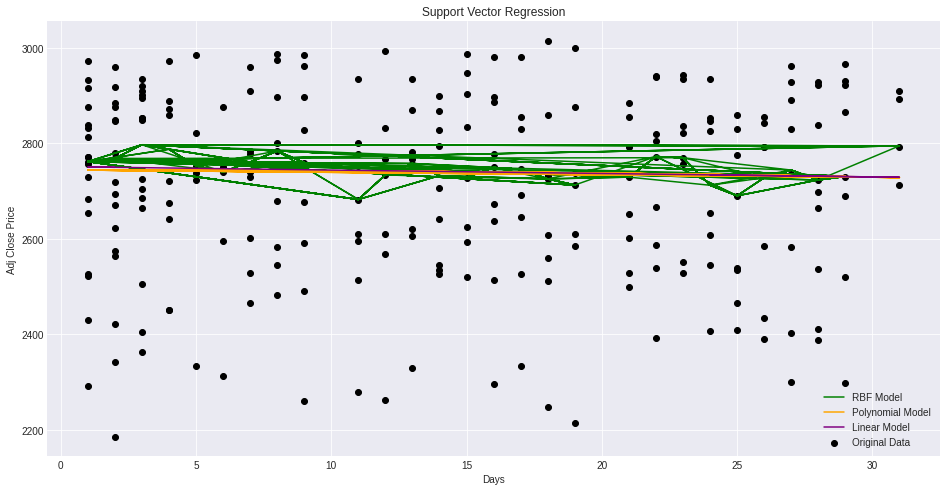

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2771.5929105]
The Linear SVR predicted: [2729.99397122]
The Polynomial SVR predicted: [2729.75679931]
